In [4]:
from manim import *
import numpy as np

In [5]:
import os
import sys

# We manually add the path to the environment variables for this session
os.environ["PATH"] += ":/Library/TeX/texbin"

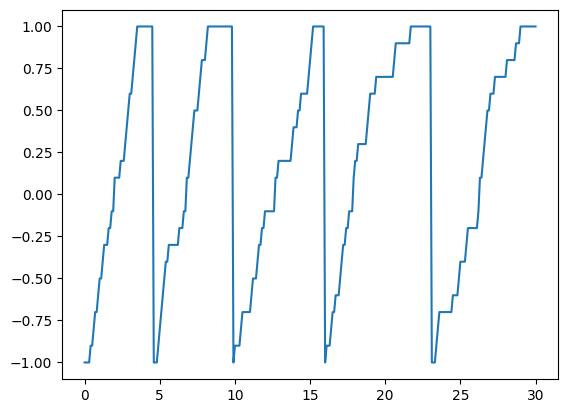

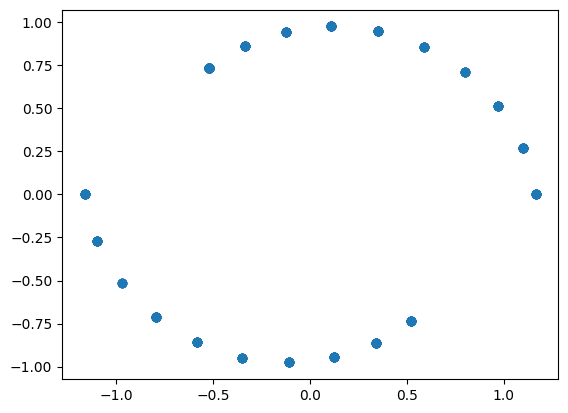

In [6]:
# calculate trajectory in state space
from thesis_functions import generate_markov_jump_process, state_mapping, build_generator_matrix, calculate_and_order_eigenspectrum, phase_reduction
import matplotlib.pyplot as plt 

# Sim params
number_of_substates = [10,10]
transition_rates = [1,1]
refractory_periods = [2,2]
total_time = 30
delta_t = 0.1 

time_sequence, state_sequence = generate_markov_jump_process(number_of_substates, transition_rates, refractory_periods, total_time, delta_t)
state_sequence = state_mapping(number_of_substates, state_sequence)

plt.plot(time_sequence, state_sequence)
plt.show()

#Build generator matrix
L = build_generator_matrix(number_of_substates,transition_rates,refractory_periods)
eigenvals,Q,P = calculate_and_order_eigenspectrum(L)
Q_sequence = phase_reduction(state_sequence, Q[-2])

plt.scatter(Q_sequence.real, Q_sequence.imag)
plt.show()

In [ ]:
%%manim -qm QSpaceTrajectoryAnimation

class QSpaceTrajectoryAnimation(Scene):
    def construct(self):
        # Setup Complex Plane with custom style
        plane = ComplexPlane(
            x_range=[-1.5, 1.5, 0.25], # Keep the fine grid (0.25)
            y_range=[-1.5, 1.5, 0.25],
            x_length=7,
            y_length=7,
            # CONTROL GRID APPEARANCE HERE:
            background_line_style={
                "stroke_color": TEAL,     # Change grid color
                "stroke_width": 2,        # Thinner lines
                "stroke_opacity": 0.3     # Much fainter (0.0 to 1.0)
            },
            # Make the main x/y axes thinner
            axis_config={
                "stroke_color": WHITE,
                "stroke_width": 4, 
                "include_tip": True
            }
        )
        
        # CONTROL LABELS HERE:
        # Only add labels for exactly -1, 1, -i, and i
        plane.add_coordinates(-1, 1, -1j, 1j)
        
        # Manually fix the label size if they are too big
        for label in plane.coordinate_labels:
            label.scale(0.8)

        # Add axis labels
        real_label = Text("Re", font_size=28, color=WHITE)
        imaginary_label = Text("Im", font_size=28, color=WHITE)
        
        real_label.next_to(plane.get_x_axis().get_right(), RIGHT, buff=0.1)
        
        imaginary_label.next_to(plane.get_y_axis().get_top(), UP, buff=0.1)

        self.add(plane,real_label, imaginary_label)

        t_index_tracker = ValueTracker(0) 

        ### Simulation part
        # Sim params
        number_of_substates = [10,10]
        transition_rates = [1,1]
        refractory_periods = [2,2]
        total_time = 30
        delta_t = 0.1 

        time_sequence, state_sequence = generate_markov_jump_process(number_of_substates, transition_rates, refractory_periods, total_time, delta_t)
        state_sequence = state_mapping(number_of_substates, state_sequence)

        state_index_sequence = np.zeros(len(state_sequence), dtype=int)

        for i in range(len(state_sequence)):
            #reconstruct the state index from the trajectory value
            ### this assumes that the initial state is -1 and the indexing increases monotonically until state 1 is reached, i.e. -1 has index 0 and 1 has index 19
            x = state_sequence[i]
            if x < 0:
                advancement = np.abs(x - state_sequence[0])
                state_index = int(np.round(10*advancement,0))
            elif x > 0:
                advancement = x
                state_index = int(np.round(10*advancement,0) + 9)
                
            state_index_sequence[i] = state_index

        #Build generator matrix
        L = build_generator_matrix(number_of_substates,transition_rates,refractory_periods)
        eigenvals,Q,P = calculate_and_order_eigenspectrum(L)

        ### End of simulation part

        # Convert complex numbers to Manim points
        fixed_manim_Q_points = [plane.n2p(c_num) for c_num in Q[-2]]

        all_dots = VGroup(*[
            Dot(point, color=BLUE, radius=0.1) 
            for point in fixed_manim_Q_points
        ])

        self.add(all_dots)

        # Now we want to animate the trajectory
        def get_highlighted_state():
            current_time = t_index_tracker.get_value()

            time_idx = np.searchsorted(time_sequence, current_time)
            # Safety clamp ensuring we don't go out of bounds
            if time_idx >= len(state_index_sequence):
                time_idx = len(state_index_sequence) - 1

            current_state_idx = state_index_sequence[time_idx]

            target_coord = fixed_manim_Q_points[current_state_idx]

            moving_dot = Dot(target_coord, color=RED, radius = 0.15)
            label = MathTex(str(current_state_idx), font_size=20, color=RED).next_to(moving_dot, UP, buff=0.1)

            return VGroup(moving_dot,label)

        dynamic_highlight = always_redraw(get_highlighted_state)

        # Add Time Label
        time_display = always_redraw(lambda: 
            Text(f"Time: {t_index_tracker.get_value():.1f}s", font_size=24)
            .to_corner(UL)
        )

        self.add(dynamic_highlight, time_display)

        self.play(
            t_index_tracker.animate.set_value(total_time), # Cycle 3 times (e.g., 0-19, 0-19, 0-19)
            run_time=30, # Total animation time
            rate_func=linear
        )
        self.wait(1)
        

Manim Community v0.19.0

[11/27/25 00:42:15] INFO     Animation 0 : Partial movie file written in                   ]8;id=385744;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=668730;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/Users/laurenzguntner/Code/Python_Projects/Bachelorarbeit_Co                         
                             de/media/videos/Bachelorarbeit_Code/720p30/partial_movie_file                         
                             s/QSpaceTrajectoryAnimation/2016333726_318283989_2532481765.m                         
                             p4'                                                                                   

                    INFO     Animation 1 : Partial movie file written in                   ]8;id=971176;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=197850;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/Users/laurenzguntner/Code/Python_Projects/Bachelorarbeit_Co                         
                             de/media/videos/Bachelorarbeit_Code/720p30/partial_movie_file                         
                             s/QSpaceTrajectoryAnimation/543634251_4071516364_2199163301.m                         
                             p4'                                                                                   

                    INFO     Combining to Movie file.                                      ]8;id=547213;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=867024;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=735;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=439483;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/Users/laurenzguntner/Code/Python_Projects/Bachelorarbeit_Co                         
                             de/media/videos/Bachelorarbeit_Code/720p30/QSpaceTrajectoryAn                         
                             imation.mp4'                                                                          
                                                                                                                   

                    INFO     Rendered QSpaceTrajectoryAnimation                                        ]8;id=268608;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=879376;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/manim/scene/scene.py#255\255]8;;\
                             Played 2 animations                                                                   